## Bibliotecas importadas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Carregar os dados

In [2]:
df_colesterol = pd.read_csv('./dataset_colesterol.csv')

In [3]:
df_colesterol.describe()

,Id,Idade,Peso,Altura,Colesterol
count,1000.000000,997.000000,997.000000,997.000000,1000.000000
mean,500.500000,49.206620,76.496690,174.889669,199.453260
std,288.819436,17.476704,21.439132,8.844703,50.625152
min,1.000000,20.000000,15.400000,160.000000,36.260000
25%,250.750000,34.000000,61.700000,167.000000,166.345000
50%,500.500000,49.000000,75.500000,175.000000,199.455000
75%,750.250000,65.000000,90.200000,183.000000,233.785000
max,1000.000000,79.000000,158.100000,190.000000,372.670000


In [4]:
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     996 non-null    object 
 2   Fumante             997 non-null    object 
 3   Nível de Atividade  996 non-null    object 
 4   Idade               997 non-null    float64
 5   Peso                997 non-null    float64
 6   Altura              997 non-null    float64
 7   Colesterol          1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [5]:
df_colesterol.head()

,Id,Grupo Sanguíneo,Fumante,Nível de Atividade,Idade,Peso,Altura,Colesterol
0,1,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,2,A,Não,Moderado,68.0,105.0,184.0,236.98
2,3,O,Não,Alto,25.0,64.8,180.0,161.79
3,4,A,Não,Alto,43.0,120.2,167.0,336.24
4,5,AB,Não,Baixo,79.0,88.5,175.0,226.23


In [6]:
# Remover coluna D
df_colesterol.drop(columns=['Id'], axis=1, inplace=True)

In [7]:
df_colesterol.columns=[
    'grupo_sanguineo',
    'fumante',
    'nivel_atividade_fisica',
    'idade',
    'peso',
    'altura',
    'nivel_colesterol'
]

## EDA e Bucketing

In [8]:
# Copiar o DF

df_colesterol_eda = df_colesterol.copy()

In [9]:
df_colesterol_bucketing = df_colesterol.copy()

In [10]:
df_colesterol_eda.head(10)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol
0,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,A,Não,Moderado,68.0,105.0,184.0,236.98
2,O,Não,Alto,25.0,64.8,180.0,161.79
3,A,Não,Alto,43.0,120.2,167.0,336.24
4,AB,Não,Baixo,79.0,88.5,175.0,226.23
5,B,Não,Baixo,68.0,66.8,170.0,185.31
6,A,Sim,Baixo,60.0,117.3,181.0,289.33
7,O,Sim,Moderado,35.0,86.9,174.0,216.48
8,O,Não,Baixo,62.0,81.3,166.0,235.30
9,B,Sim,Alto,44.0,32.7,165.0,97.79


In [11]:
df_colesterol_eda.grupo_sanguineo.unique()

array(['B', 'A', 'O', 'AB', nan], dtype=object)

In [12]:
df_colesterol_eda.fumante.unique()

array(['Sim', 'Não', nan], dtype=object)

In [13]:
df_colesterol_eda.nivel_atividade_fisica.unique()

array(['Baixo', 'Moderado', 'Alto', nan], dtype=object)

In [14]:
# Detectar os valores ausentes
df_colesterol_eda.isna().sum()

grupo_sanguineo           4
fumante                   3
nivel_atividade_fisica    4
idade                     3
peso                      3
altura                    3
nivel_colesterol          0
dtype: int64

In [15]:
df_colesterol_eda.describe()

,idade,peso,altura,nivel_colesterol
count,997.000000,997.000000,997.000000,1000.000000
mean,49.206620,76.496690,174.889669,199.453260
std,17.476704,21.439132,8.844703,50.625152
min,20.000000,15.400000,160.000000,36.260000
25%,34.000000,61.700000,167.000000,166.345000
50%,49.000000,75.500000,175.000000,199.455000
75%,65.000000,90.200000,183.000000,233.785000
max,79.000000,158.100000,190.000000,372.670000


In [16]:
moda_fumante = df_colesterol['fumante'].mode()
moda_grupo_sanguineo = df_colesterol['grupo_sanguineo'].mode()
nivel_atividade_fisica = df_colesterol['nivel_atividade_fisica'].mode()

mediana_idade = df_colesterol['idade'].median()
mediana_peso = df_colesterol['peso'].median()
mediana_altura = df_colesterol['altura'].median()

In [17]:
df_colesterol_eda.fillna(value={'fumante': moda_fumante[0],
                                'grupo_sanguineo':moda_grupo_sanguineo[0],
                                'nivel_atividade_fisica': nivel_atividade_fisica[0],
                                'idade':mediana_idade,
                                'peso': mediana_peso,
                                'altura': mediana_altura}, inplace=True)

In [18]:
df_colesterol_eda.idade = df_colesterol_eda.idade.astype(int)
df_colesterol_eda.altura = df_colesterol_eda.altura.astype(int)

In [19]:
df_colesterol_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grupo_sanguineo         1000 non-null   object 
 1   fumante                 1000 non-null   object 
 2   nivel_atividade_fisica  1000 non-null   object 
 3   idade                   1000 non-null   int64  
 4   peso                    1000 non-null   float64
 5   altura                  1000 non-null   int64  
 6   nivel_colesterol        1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


<Axes: xlabel='idade'>

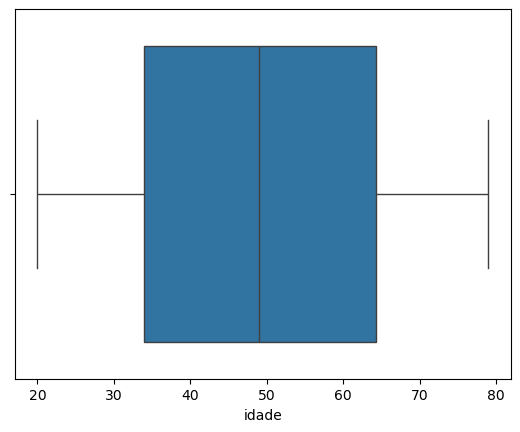

In [20]:
sns.boxplot(data=df_colesterol_eda, x='idade')

<Axes: xlabel='peso'>

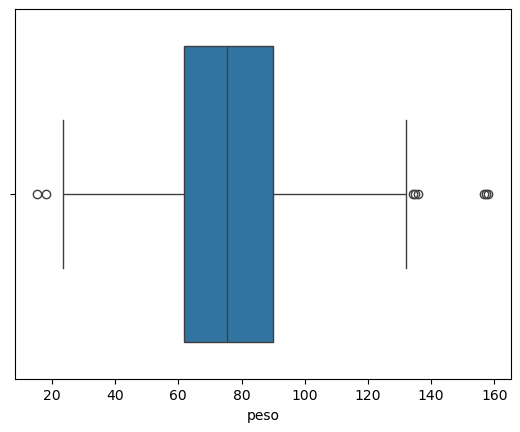

In [21]:
sns.boxplot(data=df_colesterol_eda, x='peso')

In [22]:
# Filtrar o público a ser removido
df_colesterol_eda[df_colesterol_eda['peso'] < 40].peso.count()

np.int64(37)

In [23]:
# Remover publico do Dataframe
df_colesterol_eda.drop(df_colesterol_eda[df_colesterol_eda['peso'] < 40].index, axis=0, inplace=True)

<Axes: xlabel='altura'>

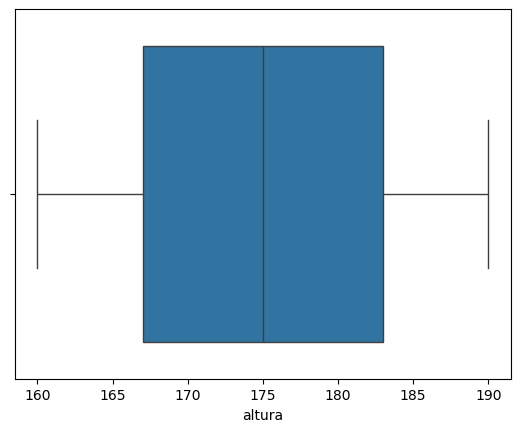

In [24]:
sns.boxplot(data=df_colesterol_eda, x='altura')

<Axes: xlabel='nivel_colesterol'>

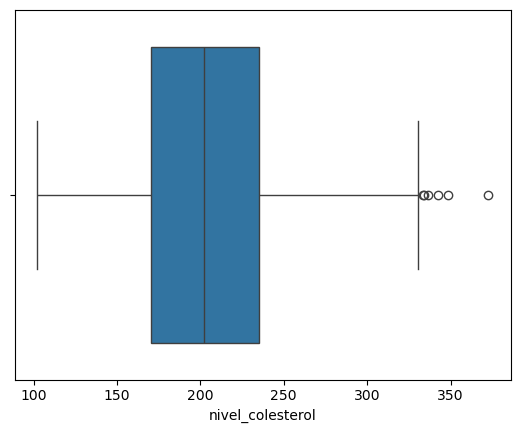

In [25]:
sns.boxplot(data=df_colesterol_eda, x='nivel_colesterol')

<Axes: xlabel='grupo_sanguineo', ylabel='nivel_colesterol'>

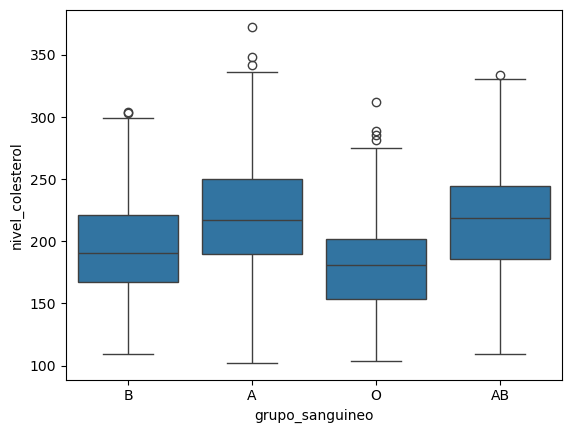

In [26]:
# Cruzamento de Variáveis categóricas com nível de colesterol
sns.boxplot(data=df_colesterol_eda, x='grupo_sanguineo', y='nivel_colesterol')

<Axes: xlabel='fumante', ylabel='nivel_colesterol'>

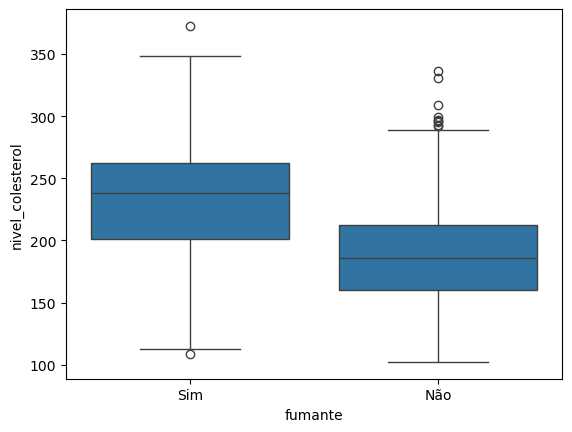

In [27]:
sns.boxplot(data=df_colesterol_eda, x='fumante', y='nivel_colesterol')

<Axes: xlabel='nivel_atividade_fisica', ylabel='nivel_colesterol'>

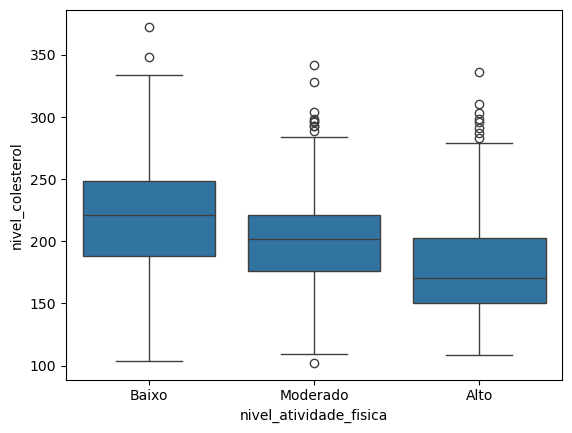

In [28]:
sns.boxplot(data=df_colesterol_eda, x='nivel_atividade_fisica', y='nivel_colesterol')

<Axes: xlabel='idade', ylabel='nivel_colesterol'>

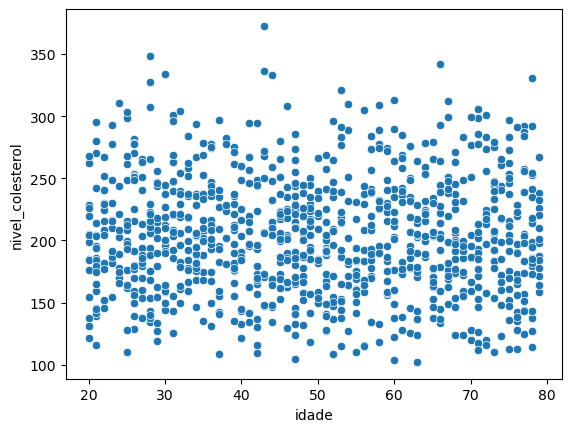

In [29]:
# Cruzamento variáveis númericas com nível de colesterol
sns.scatterplot(data=df_colesterol_eda, x='idade', y='nivel_colesterol')

<Axes: xlabel='peso', ylabel='nivel_colesterol'>

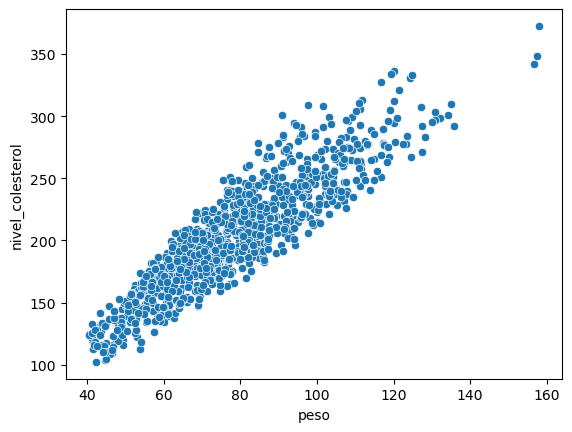

In [30]:
sns.scatterplot(data=df_colesterol_eda, x='peso', y='nivel_colesterol')

<Axes: xlabel='altura', ylabel='nivel_colesterol'>

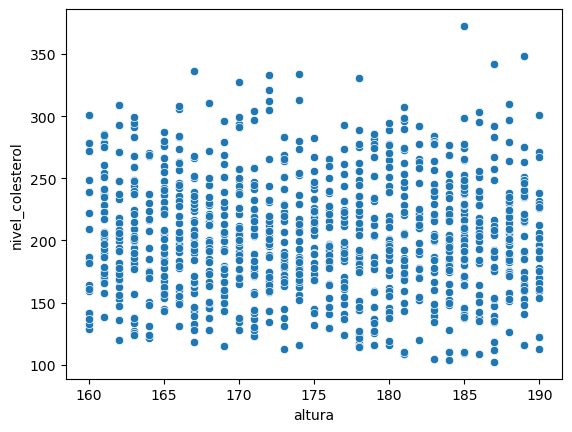

In [31]:
sns.scatterplot(data=df_colesterol_eda, x='altura', y='nivel_colesterol')

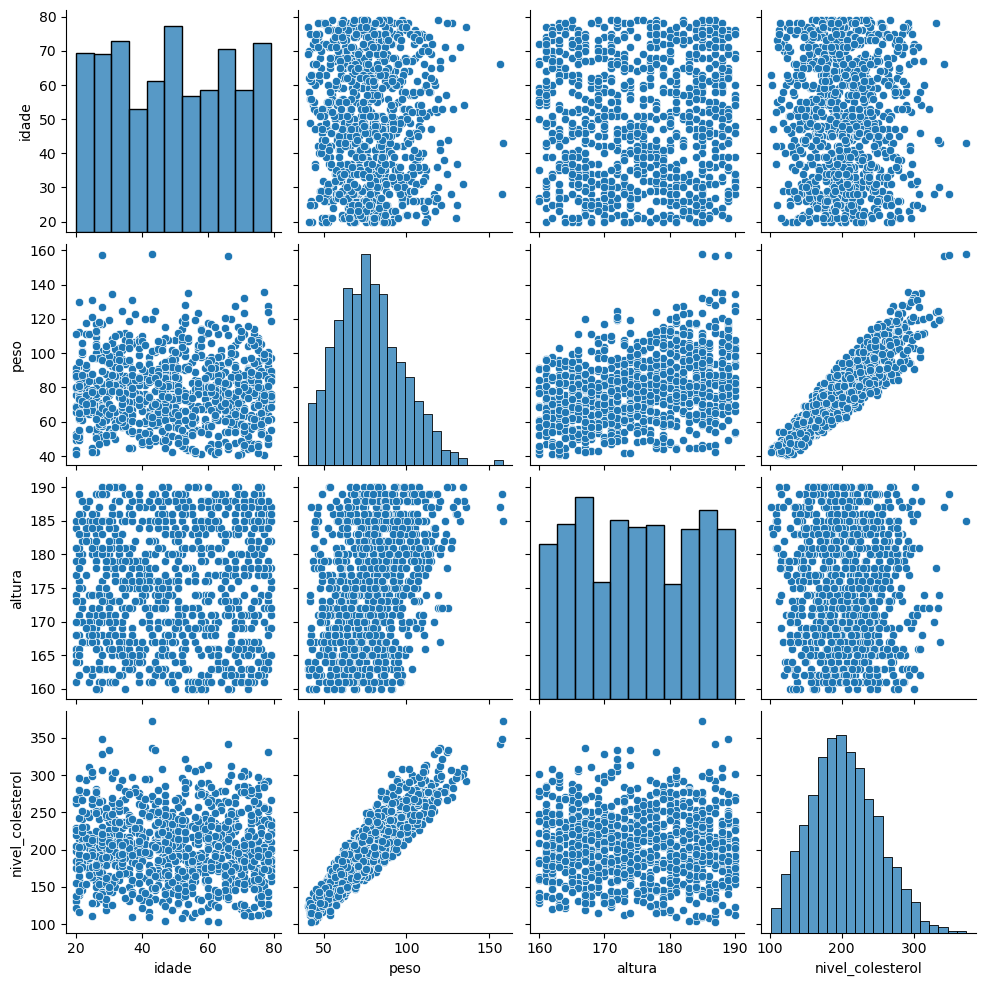

In [32]:
sns.pairplot(df_colesterol_eda)

In [33]:
# Converter variaveis categoricas nominais em numericas, usando one-hot Enconder do Pandas
df_colesterol_eda = pd.get_dummies(df_colesterol_eda,columns=['grupo_sanguineo', 'fumante'], dtype='int64')

In [34]:
df_colesterol_eda.head()

,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol,grupo_sanguineo_A,grupo_sanguineo_AB,grupo_sanguineo_B,grupo_sanguineo_O,fumante_Não,fumante_Sim
0,Baixo,33,85.1,186,199.63,0,0,1,0,0,1
1,Moderado,68,105.0,184,236.98,1,0,0,0,1,0
2,Alto,25,64.8,180,161.79,0,0,0,1,1,0
3,Alto,43,120.2,167,336.24,1,0,0,0,1,0
4,Baixo,79,88.5,175,226.23,0,1,0,0,1,0


In [35]:
# converter variavel categorica ordial em numérica, usando factorize do Pantas
df_colesterol_eda['nivel_atividade_fisica'] = pd.factorize(df_colesterol_eda.nivel_atividade_fisica)[0] + 1

<Axes: >

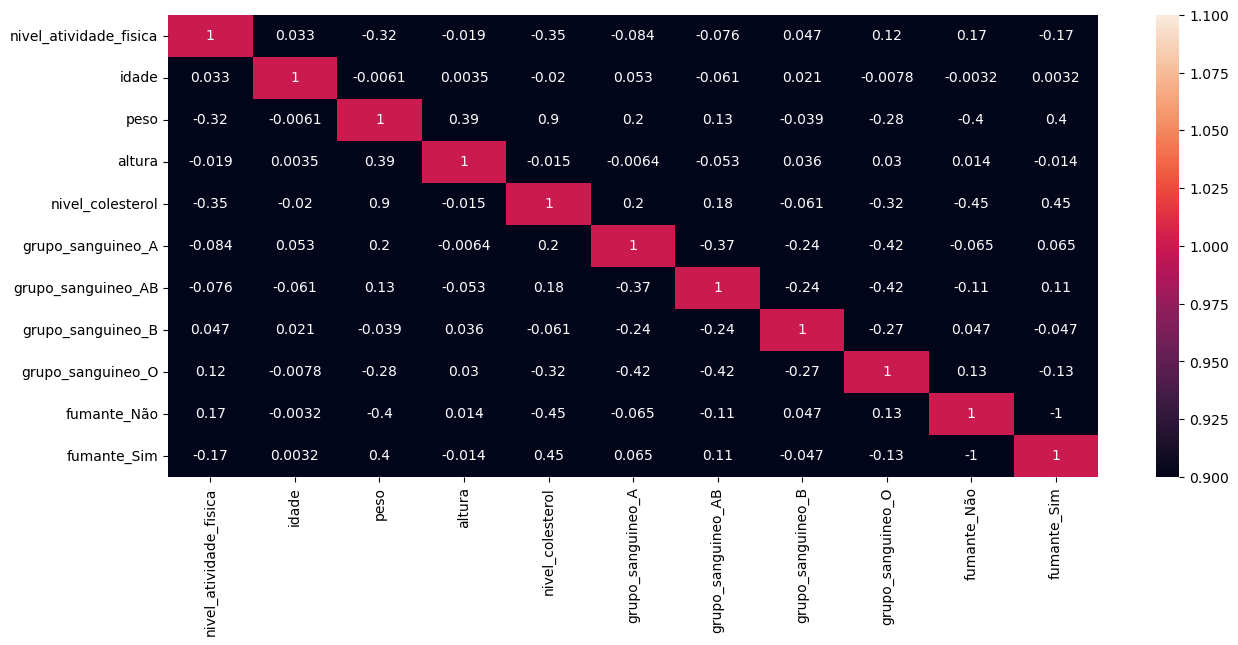

In [36]:
# Mapa de calor com Correlação entre as variáveis
plt.figure(figsize=(15,6))
sns.heatmap(df_colesterol_eda.corr(),vmin=1,vmax=1,annot=True)

<Axes: >

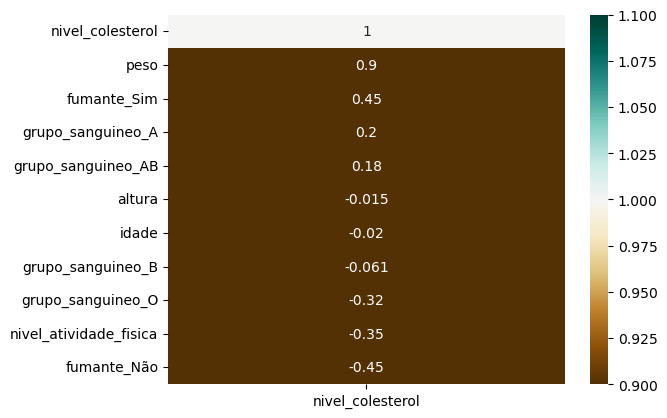

In [37]:
sns.heatmap(df_colesterol_eda.corr()[['nivel_colesterol']].sort_values(by='nivel_colesterol',ascending=False), vmax=1,vmin=1,annot=True, cmap='BrBG')

In [38]:
# Bucketing Idade

bins_idade = [20,30,40,50,60,70,80]
labels_idade = ['20-29','30-39','40-49','50-59','60-69','70-79']
df_colesterol_bucketing['escala_idade'] = pd.cut(x=df_colesterol_bucketing['idade'],bins=bins_idade,labels=labels_idade,include_lowest=True)


In [39]:
df_colesterol_bucketing.head()

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol,escala_idade
0,B,Sim,Baixo,33.0,85.1,186.0,199.63,30-39
1,A,Não,Moderado,68.0,105.0,184.0,236.98,60-69
2,O,Não,Alto,25.0,64.8,180.0,161.79,20-29
3,A,Não,Alto,43.0,120.2,167.0,336.24,40-49
4,AB,Não,Baixo,79.0,88.5,175.0,226.23,70-79


<Axes: xlabel='escala_idade', ylabel='nivel_colesterol'>

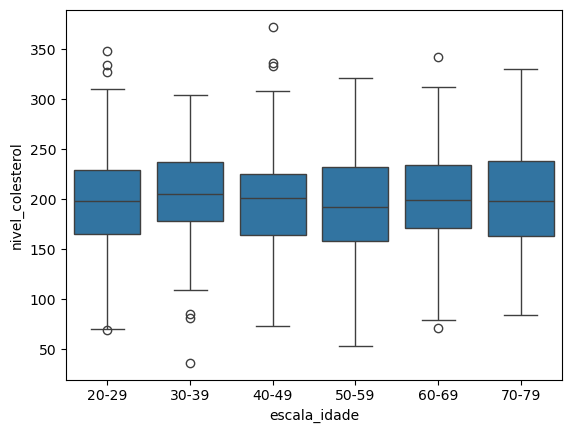

In [40]:
sns.boxplot(data=df_colesterol_bucketing,x='escala_idade',y='nivel_colesterol')

In [41]:
# Bucketing peso

bins_peso = [40,50,60,70,80,90,100,110,120,130,140,150,160]
labels_peso = ['40-49','50-59','60-69','70-79','80-89','90-99','100-109','110-119','120-129','130-139','140-149','150-159']
df_colesterol_bucketing['escala_peso'] = pd.cut(x=df_colesterol_bucketing['peso'],bins=bins_peso,labels=labels_peso,include_lowest=True)


<Axes: xlabel='escala_peso', ylabel='nivel_colesterol'>

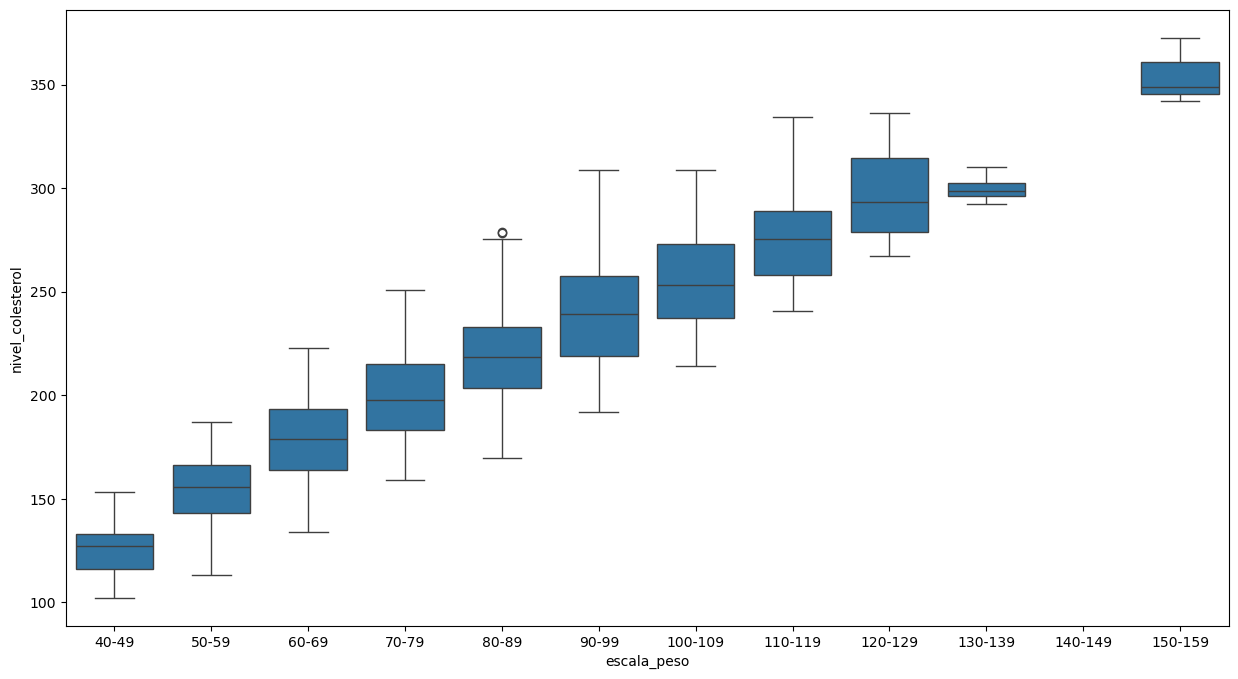

In [42]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_colesterol_bucketing, x='escala_peso',y='nivel_colesterol')

# Treinar o Modelo
### Vamos usar o pipeline para tratar multiplas variáveis

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [44]:
# Criar o Dataset de Treino e Teste
# Removento outliers
df_colesterol.drop(df_colesterol[df_colesterol['peso'] < 40].index,axis=0, inplace=True)

In [45]:
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grupo_sanguineo         960 non-null    object 
 1   fumante                 960 non-null    object 
 2   nivel_atividade_fisica  959 non-null    object 
 3   idade                   960 non-null    float64
 4   peso                    960 non-null    float64
 5   altura                  960 non-null    float64
 6   nivel_colesterol        963 non-null    float64
dtypes: float64(4), object(3)
memory usage: 60.2+ KB


In [46]:
X = df_colesterol.drop(columns='nivel_colesterol', axis=1)
y = df_colesterol['nivel_colesterol']

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=51)

In [48]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(770, 6)
(193, 6)
(770,)
(193,)


In [49]:
# Construção de pipeline
# Precisamos: 
# - Imputar moda nas variáveis categóricas (grupo_sanguineo,fumante,nivel_atividade_fisica)
# - Padronizar variáveis númericas - (idade, altura,peso)
# - ONeHotEncode nas variáveis nominais - grupo_sanguineo, fumante
# - OrdinalEnconder nas variáveis categóricas ordinais - nivel_atividade_fisica
# - Imputar mediana nas variáveis numéricas - idade, altura, peso

# Nomes das colunas
colunas_categoricas = ['grupo_sanguineo','fumante']
colunas_numericas = ['idade','altura','peso']
colunas_ordinais = ['nivel_atividade_fisica']

In [50]:
# Transformer Categorias
transformer_categorias = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)

In [51]:
# Transformer Ordinais
transformer_ordinais = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('ordinal', OrdinalEncoder(categories=[['Baixo','Moderado','Alto']],handle_unknown='error'))
    ]
)

In [52]:
# Transformer Numéricas
transformer_numericas = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

In [53]:
# Criar um ColumnTransformer que encapsula todas as transformações
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numericas,colunas_numericas),
        ('cat',transformer_categorias,colunas_categoricas),
        ('ord',transformer_ordinais,colunas_ordinais)
    ]
)

In [54]:
# Criando pipeline principal - Pre processamento + modelo
model_regr = Pipeline(steps=[('preprocessor',preprocessor),
                             ('regressor', LinearRegression())])

In [55]:
# Treinar o modelo
model_regr.fit(X_train,y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


# Analisando Métricas

### - r2-score: Para saber se a variância dos dados da variável dependente é explicada pela variação das variáveis independentes
### - mean absolute error
### - mean squared error

In [56]:
# Gerar Predição
y_pred = model_regr.predict(X_test)

In [57]:
# Calcular o R2 Score
r2_score(y_test,y_pred)

0.9556257589721976

In [58]:
# Calcular o MAE
mean_absolute_error(y_test,y_pred)

7.549628980202547

In [59]:
# Calcular RMSE (Root Mean Squared Error)
import numpy as np
np.sqrt(mean_squared_error(y_test, y_pred))

np.float64(9.472098846503338)

# Análise de Resíduos do modelo de Regressão
## Com testes estatísticos

In [60]:
# Calcular residuos
residuos = y_test - y_pred


In [61]:
# Transformar os residuos na escala padrão
# (x - media)/ desvio padrão

from scipy.stats import zscore

residuos_std = zscore(residuos)


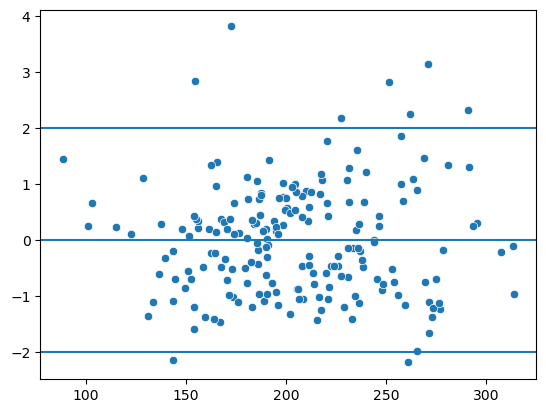

In [62]:
# Verificar linearidade dos residuos: Se os valores estáo entre -2 e +2
# Verificar Homocedasticidade: Valores em torno da reta

sns.scatterplot(x=y_pred,y=residuos_std)
plt.axhline(y=0)
plt.axhline(y=-2)
plt.axhline(y=2)

### Existe alguns itens fora, mas não é uma quantidade considerável
### Não há uma tendência a ter um formato de cone ou um formato de um funil, os valores parecem estar espalhados em torno da reta

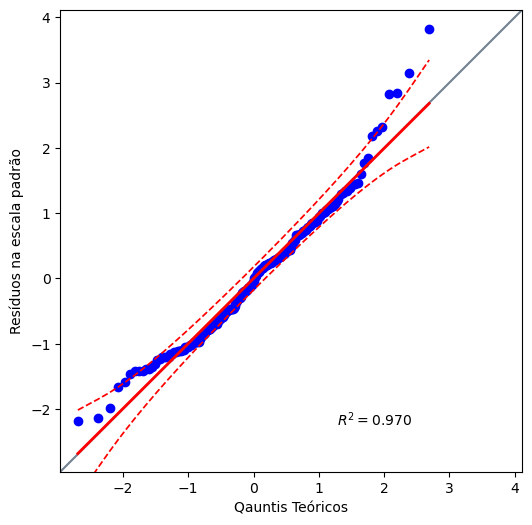

In [63]:
# Vamos checar se os resíduos seguem uma distribuição normal
# QQ Plot
import pingouin as pg
plt.figure(figsize=(14,6))
pg.qqplot(residuos_std,dist='norm',confidence=0.95)
plt.xlabel('Qauntis Teóricos')
plt.ylabel('Resíduos na escala padrão')
plt.show()

In [64]:
# Teste de normalidade de shapiro-wilk, se o p_value for  < 0.05 rejeitamos h0
from scipy.stats import shapiro, kstest, anderson
from statsmodels.stats.diagnostic import lilliefors, het_goldfeldquandt
stat_shapiro, p_value_shapiro = shapiro(residuos)
print("Estatistica do Teste: {} e P-Value: {}".format(stat_shapiro,p_value_shapiro))

Estatistica do Teste: 0.9715401730299146 e P-Value: 0.0005776344373781623


In [65]:
# Teste de Kolmogorov-Smirnov se o p_value for < 0.05 rejeitamos h0
stat_ks, p_value_ks = kstest(residuos,'norm')
print("Estatistica do Teste: {} e P-Value: {}".format(stat_ks,p_value_ks))

Estatistica do Teste: 0.41771720891354464 e P-Value: 5.074846348316375e-31


In [66]:
# Teste de lilliefors se o p_value for < 0.05 rejeitamos h0
stat_ll, p_value_ll = lilliefors(residuos,dist='norm',pvalmethod='table')
print("Estatistica do Teste: {} e P-Value: {}".format(stat_ll,p_value_ll))

Estatistica do Teste: 0.05778899374680885 e P-Value: 0.13839268006555336


### 2 Testes indicaram para rejeitar e um indicaram par não rejeitar h0

In [67]:
# Teste de Anderson-Darling
stat_and, critial_and, significance_and = anderson(residuos,dist='norm')

In [68]:
# Retorna um valor para cada nivel de significância que está abaixo 15%,10%...
critial_and

array([0.565, 0.643, 0.772, 0.9  , 1.071])

In [69]:
significance_and

array([15. , 10. ,  5. ,  2.5,  1. ])

In [70]:
print("Estatistica do Teste: {} e Valor Crítico: {}".format(stat_and,critial_and[2]))

Estatistica do Teste: 0.9667751643196993 e Valor Crítico: 0.772


### O valor é da estatistica do teste é maior do que o valor crítico, eu posso rejeitar h0, Logo os resíduos não seguem uma distribuição normal

In [71]:
# Teste de homocedasticidade de Goldfeld-Quandt
pipe = Pipeline(steps=[('preprocessor',preprocessor)])
X_test_transformed = pipe.fit_transform(X_test)

In [72]:
X_test_transformed

array([[-1.44730333, -0.50890327,  0.29485527, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.31053418, -0.99453162, -1.19403133, ...,  1.        ,
         0.        ,  0.        ],
       [-1.10960894, -0.2660891 , -0.81913183, ...,  0.        ,
         1.        ,  1.        ],
       ...,
       [ 1.53566377, -1.35875287,  0.0913384 , ...,  0.        ,
         1.        ,  1.        ],
       [-0.77191455,  0.34094632,  0.95896296, ...,  1.        ,
         0.        ,  0.        ],
       [-0.99704414, -0.75171745, -1.14047426, ...,  1.        ,
         0.        ,  1.        ]])

In [73]:
test_goldfeld = het_goldfeldquandt(residuos, X_test_transformed)
stat_goldfeld = test_goldfeld[0]
p_value_goldfeld = test_goldfeld[1]
print("Estatistica do Teste: {} e P-Value: {}".format(stat_goldfeld,p_value_goldfeld))

Estatistica do Teste: 0.8556991868902993 e P-Value: 0.7660453670903724
